# USE CASE DESCRIPTION:
    In competetve banking industry, customer has several choices of banks and services and may stop using product/service or switch to other banks. Banks need to determine customer's loyalty, churn risk and improve costomer retention. For this a model is required to predict/assess customer's churn risk.

## Customer Churn Prediction

We have used supervised learning models to identify customers who are likely to leave

## It is a classification problem where we have to predict whether a customer would leave or not.

In [8]:
#import necessary modules

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split


%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import xgboost as xgb

import seaborn as sns

## Obtain the Data

Data Source : https://github.com/var97/Customer-Churn-Problem/blob/master/Churn_Modelling.csv

In [9]:
data = pd.read_csv("Churn_Modelling.csv")

## Data Exploration

In [10]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfComplainsRaised,HasCrCard,RecentTransactions,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.shape

(10000, 14)

In [12]:
data.dtypes

RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfComplainsRaised      int64
HasCrCard                 int64
RecentTransactions        int64
EstimatedSalary         float64
Exited                    int64
dtype: object

In [13]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfComplainsRaised,HasCrCard,RecentTransactions,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.011400,76485.889288,1.531700,0.704900,0.514700,100090.239881,0.221900
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892491,62397.405202,0.583634,0.456111,0.499809,57510.492818,0.415545
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Missing value imputation
#### Check to see if the data has missing values. Observe that there is no missing value!

In [14]:
data.isnull().any()

RowNumber               False
CustomerId              False
Surname                 False
CreditScore             False
Geography               False
Gender                  False
Age                     False
Tenure                  False
Balance                 False
NumOfComplainsRaised    False
HasCrCard               False
RecentTransactions      False
EstimatedSalary         False
Exited                  False
dtype: bool

### Check if duplicate row present in the data set

In [15]:
data.duplicated().any()

False

## We can conclude that the Dataset has 10000 samples and 14 features with no missing or duplicate values

## Target Variable

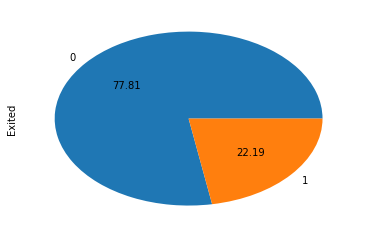

In [16]:
churncount = data["Exited"].value_counts()
# labels = ['Stays','Left']
# churncount.plot.pie(autopct = '%.2f',labels = labels)
churncount.plot.pie(autopct = '%.2f')
plt.show()

## We observe 78% is the non churn rate and 22% is the churn rate in the given data set

## Feature Selection and Reduction 

Dropping the following features because our assumption is that these features should not affect churn.
    1) RowNumber
    2) Surname
    3) CustomerId

In [17]:
data = data.drop(["RowNumber","Surname","CustomerId"],axis = 1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfComplainsRaised', 'HasCrCard', 'RecentTransactions',
       'EstimatedSalary', 'Exited'],
      dtype='object')

## Exploratory Data Analysis

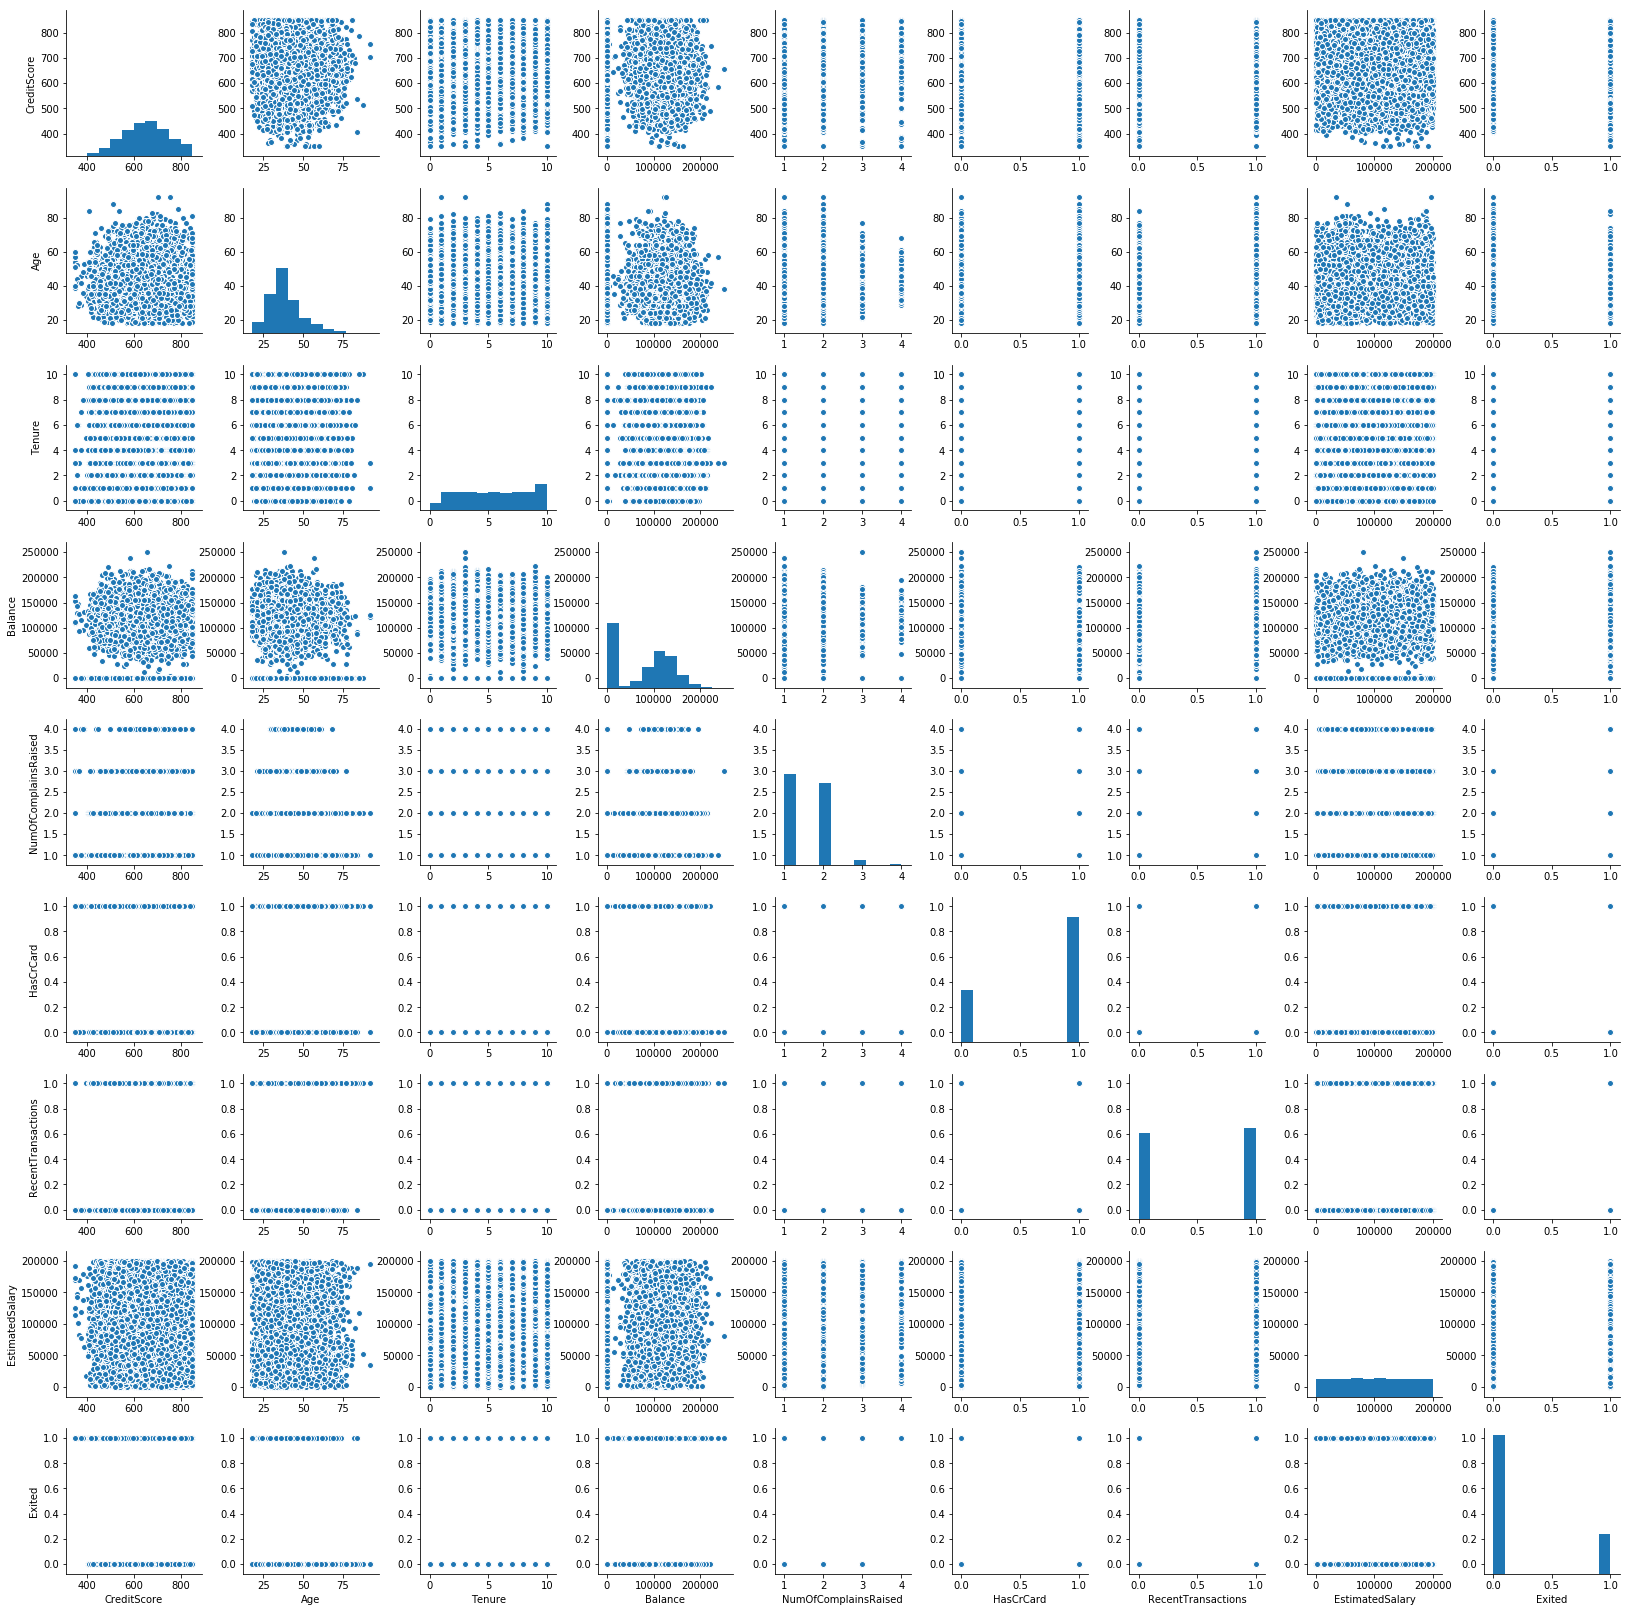

In [18]:
# To understand each feature
sns.pairplot(data)
# data.hist(figsize=(15,10))

## Correlation Matrix

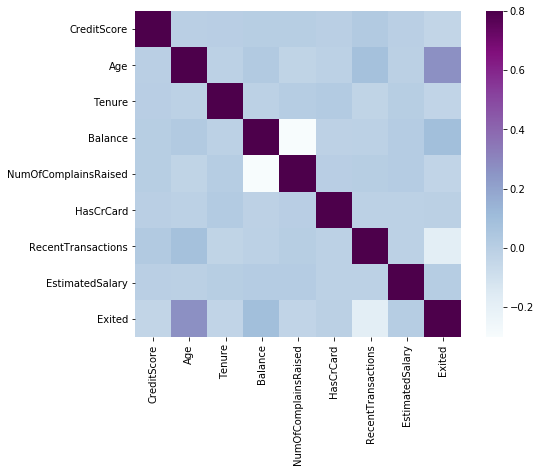

In [19]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### Independent Variable (Categorical)

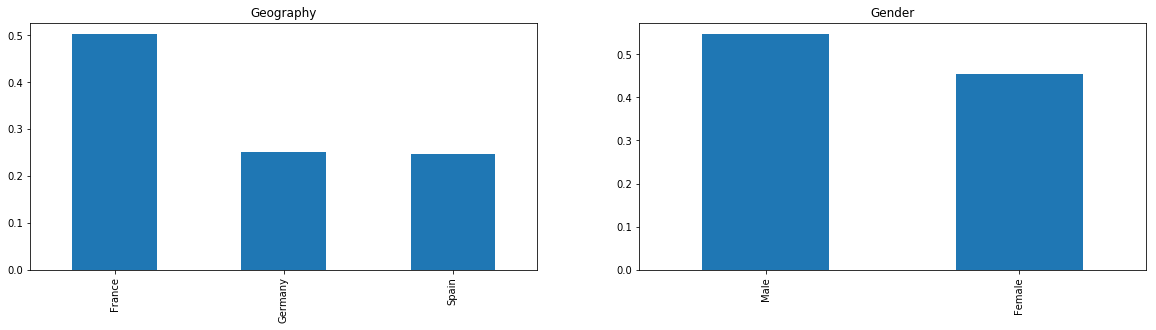

In [20]:
plt.figure(1)
plt.subplot(221)
data['Geography'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Geography')

plt.subplot(222)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

### Categorical Independent Variable vs Target Variable

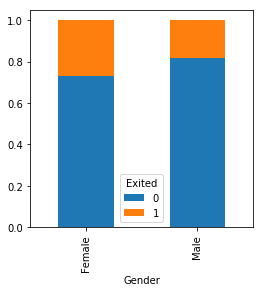

In [21]:
Gender=pd.crosstab(data['Gender'],data['Exited'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

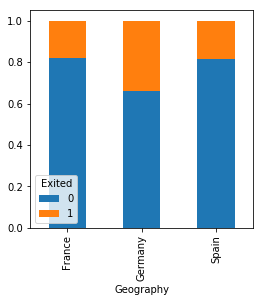

In [22]:
Geography=pd.crosstab(data['Geography'],data['Exited'])
Geography.div(Geography.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

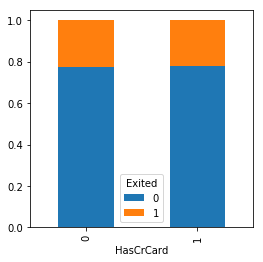

In [23]:
HasCrCard=pd.crosstab(data['HasCrCard'],data['Exited'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

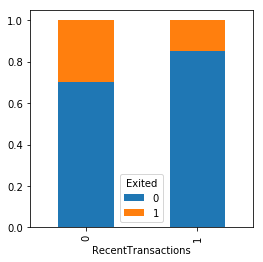

In [24]:
RecentTransactions=pd.crosstab(data['RecentTransactions'],data['Exited'])
RecentTransactions.div(RecentTransactions.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

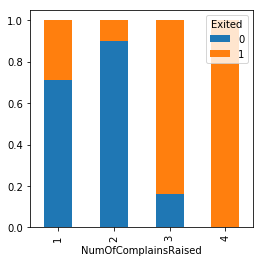

In [25]:
NumOfComplainsRaised=pd.crosstab(data['NumOfComplainsRaised'],data['Exited'])
NumOfComplainsRaised.div(NumOfComplainsRaised.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

### Numerical Independent Variable vs Target Variable

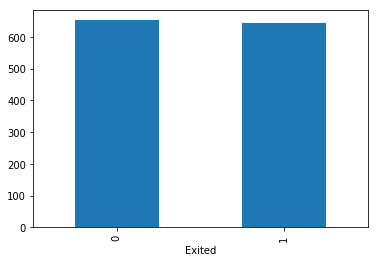

In [26]:
data.groupby('Exited')['CreditScore'].mean().plot.bar()

Here the y-axis represents the mean CreditScore. We don’t see any change in the mean income. So, let’s make bins for the CreditScore variable based on the values in it and analyze the corresponding churn status for each bin.

In [27]:
data['CreditScore_grp']=pd.cut(data['CreditScore'],bins=8)

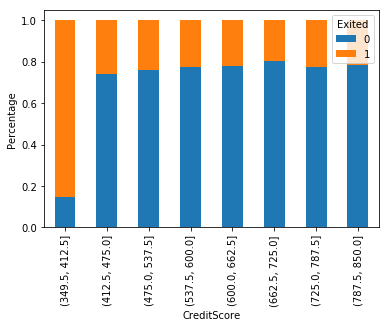

In [28]:
CreditScore_grp=pd.crosstab(data['CreditScore_grp'],data['Exited'])
CreditScore_grp.div(CreditScore_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CreditScore')
P = plt.ylabel('Percentage')

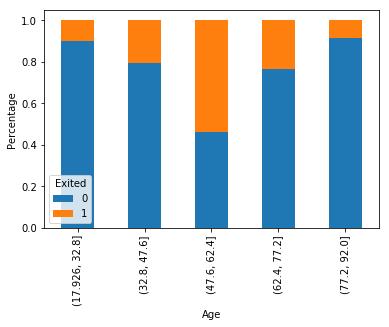

In [29]:
data['Age_grp']=pd.cut(data['Age'],bins=5)
Age_grp=pd.crosstab(data['Age_grp'],data['Exited'])
Age_grp.div(Age_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age')
P = plt.ylabel('Percentage')

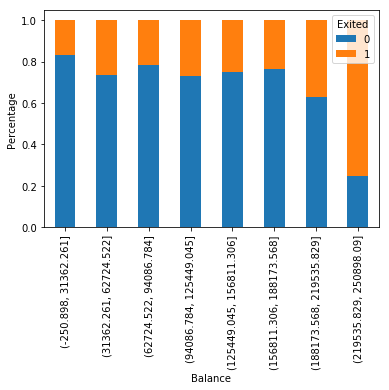

In [30]:
data['Balance_grp']=pd.cut(data['Balance'],bins=8)
Balance_grp=pd.crosstab(data['Balance_grp'],data['Exited'])
Balance_grp.div(Balance_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Balance')
P = plt.ylabel('Percentage')

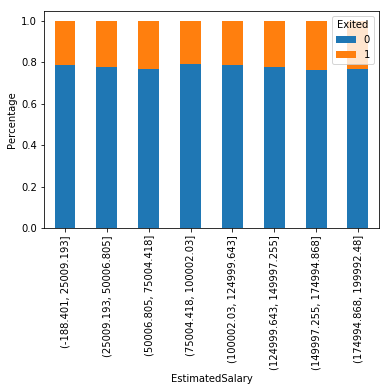

In [31]:
data['EstimatedSalary_grp']=pd.cut(data['EstimatedSalary'],bins=8)
EstimatedSalary_grp=pd.crosstab(data['EstimatedSalary_grp'],data['Exited'])
EstimatedSalary_grp.div(EstimatedSalary_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('EstimatedSalary')
P = plt.ylabel('Percentage')

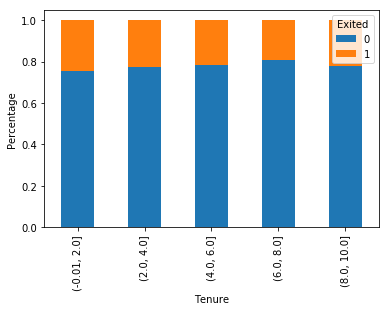

In [32]:
data['Tenure_grp']=pd.cut(data['Tenure'],bins=5)
Tenure_grp=pd.crosstab(data['Tenure_grp'],data['Exited'])
Tenure_grp.div(Tenure_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Tenure')
P = plt.ylabel('Percentage')

In [33]:
print(data.Gender.unique())
print(data.Geography.unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


In [34]:
#Since they are categorical , we can change them to numberic using encoder

data['Gender'] = le.fit_transform(data.Gender.values)
data['Geography'] = le.fit_transform(data.Geography.values)

In [35]:
data = data.drop(['EstimatedSalary_grp','Tenure_grp','Balance_grp','CreditScore_grp','Age_grp'],axis=1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfComplainsRaised', 'HasCrCard', 'RecentTransactions',
       'EstimatedSalary', 'Exited'],
      dtype='object')

## Model Selection

In [36]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier

In [37]:
X = data
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## K-fold Cross-Validation

We will compare 11 of the most popular classifiers and evaluate their performance using a stratified kfold cross validation procedure.

    Logistic Regression
    Linear Discriminant Analysis
    SVC
    KNN
    Random Forest (RFC)
    Decision Tree
    Extra Trees (ExtC)
    AdaBoost (Ada)
    Gradient Boosting (GBC)
    Multiple layer perceptron (neural network)
    XGBoost


In [38]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)

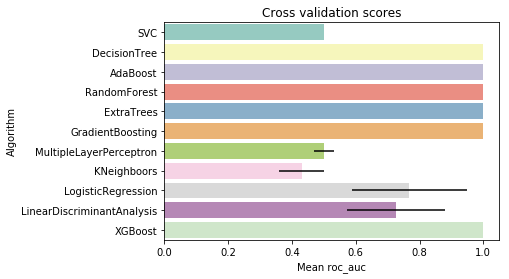

In [39]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")

We decide to choose:

    RandomForest
    GradientBoosting
    XGBoost
    
for further fine-tunning as we see their score 100%

## Training the Model

### RandomForest

In [40]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   13.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(2, 7), 'min_samples_split': range(4, 10), 'min_samples_leaf': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [41]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 1.0
Best parameters set: 
 {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [42]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

### Gradient Boosting

In [43]:
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:   10.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'loss': ['deviance'], 'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [4, 8], 'min_samples_leaf': [100, 150], 'max_features': [0.3, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [44]:
gb_best = grid_gb.best_estimator_
# Best score
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.5
Best parameters set: 
 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 100}


In [45]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

### XGBoost

In [46]:
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:    8.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.025, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.25, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [47]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 1.0
Best parameters set: 
 {'learning_rate': 0.025, 'max_depth': 3, 'subsample': 0.25}


In [48]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

### Comparing Plot learning curves of the Best Models

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

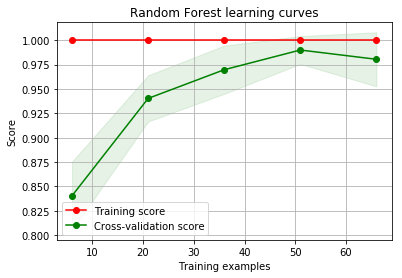

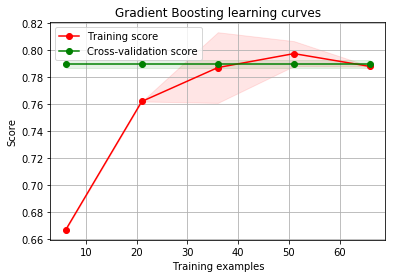

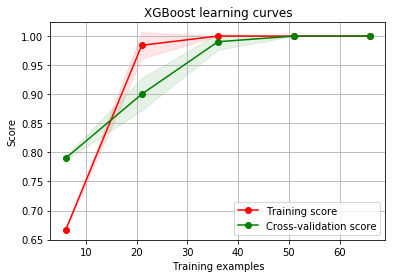

In [49]:
# Plot learning curves
#grid_svm, grid_rf, grid_gb, grid_knn, grid_lr, grid_xgb

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

### We see that Random Forest tend to overfit the training set. 

### When compare to GradientBoosting, XGBoost classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.

# Performance Evaluation of the Models

### Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [50]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Gradient Boosting
Accuracy is 0.777979797979798
Precision is nan
Recall is 0.0
F1 score is nan
ROC AUC is 0.5


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


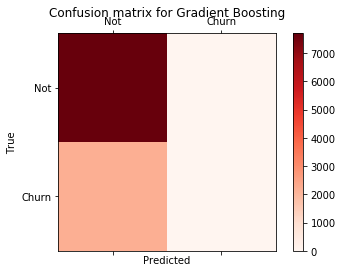

Random Forest
Accuracy is 0.9982828282828283
Precision is 1.0
Recall is 0.9922656960873522
F1 score is 0.996117835122174
ROC AUC is 0.9999994979028881


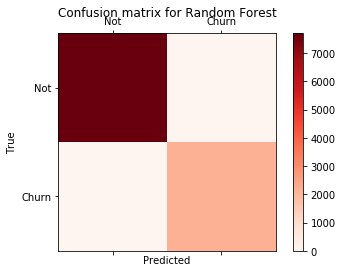

XGBoost Classifier
Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 score is 1.0
ROC AUC is 1.0


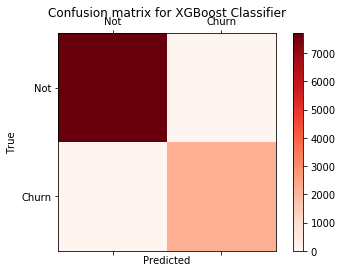

In [51]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(y_test, y_pred_gb), roc_auc_score(y_test, y_prob_gb)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

#### Gradient Boosting
Accuracy is 0.777979797979798

#### Random Forest
Accuracy is 0.9982828282828283

#### XGBoost Classifier
Accuracy is 1.0

## Conclusion

## Thus we will use XGBoost as our Prediction Model

## Feature importance of Random Forest and XGBoost Classifier


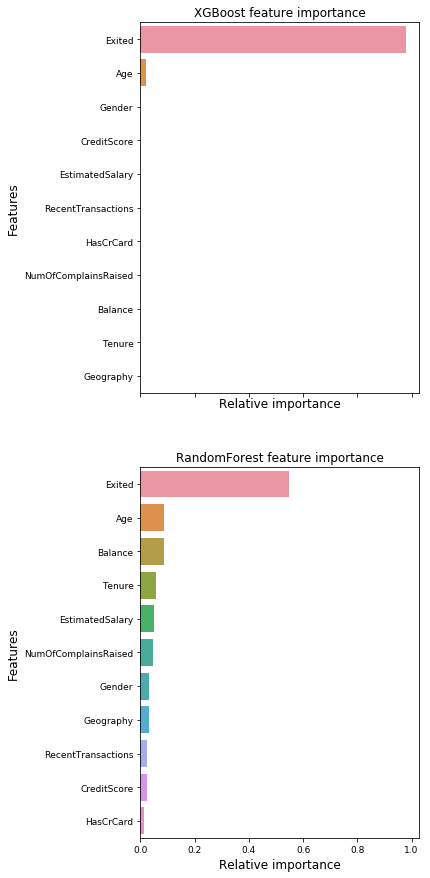

In [52]:
#nrows = ncols = 2
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best),("RandomForest",rf_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

## Thus we see the most informative feature is Age.

## Other important features are Balance, Tenure and NumofComplaintsRaised

## Thus we can conclude that Bank has to monitor those customers that fall in the risk range of these features and try to look for reducing the churn rate by providing additional services.

## As mentioned above , we can use XGBoost algorithm to predict the customers that has high rate for churn

In [ ]:
....